In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv('csv_files/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Scrubbing/Cleaning

In [3]:
#Checking for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
#Drop null rows in view
df.dropna(subset=['view'],inplace=True)

In [5]:
df.waterfront.value_counts()

0.0    19019
1.0      145
Name: waterfront, dtype: int64

Waterfront appears to be catagorical

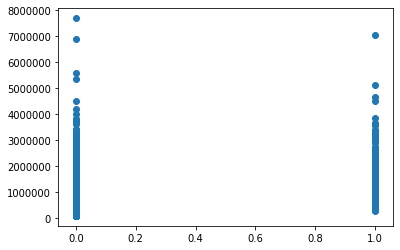

In [6]:
plt.scatter(df.waterfront, df.price)


In [7]:
type('waterfront')

str

In [8]:
df.yr_renovated.value_counts()

0.0       16961
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

(1940, 2019)

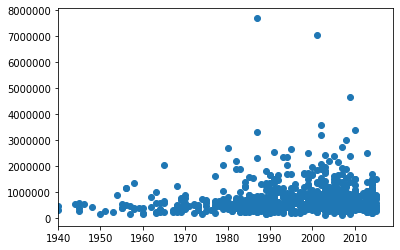

In [9]:
plt.scatter(df.yr_renovated, df.price)
plt.xlim(1940,2019)

yr_renovated does not appear to affect price

In [10]:
#Drop waterfront, yr_renovated, and id
df = df.drop(['waterfront', 'yr_renovated', 'id'], axis=1)

In [11]:
df.condition.value_counts()

3    13981
4     5657
5     1697
2      170
1       29
Name: condition, dtype: int64

In [12]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [13]:
df.bathrooms.value_counts()

2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [14]:
df.floors.value_counts()

1.0    10643
2.0     8211
1.5     1903
3.0      611
2.5      159
3.5        7
Name: floors, dtype: int64

In [15]:
df.bedrooms.value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [16]:
#Dropping outlier of 33 bedrooms
df = df[df.bedrooms != 33]

In [17]:
df.grade.value_counts()

7     8947
8     6053
9     2604
6     2031
10    1130
11     397
5      242
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [18]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
#Keeping date to day and month
df.date=pd.to_datetime(df.date, format="%m/%d/%Y");
df.date=df.date.astype(str)
df.date=df.date.map(lambda x: x[:7])

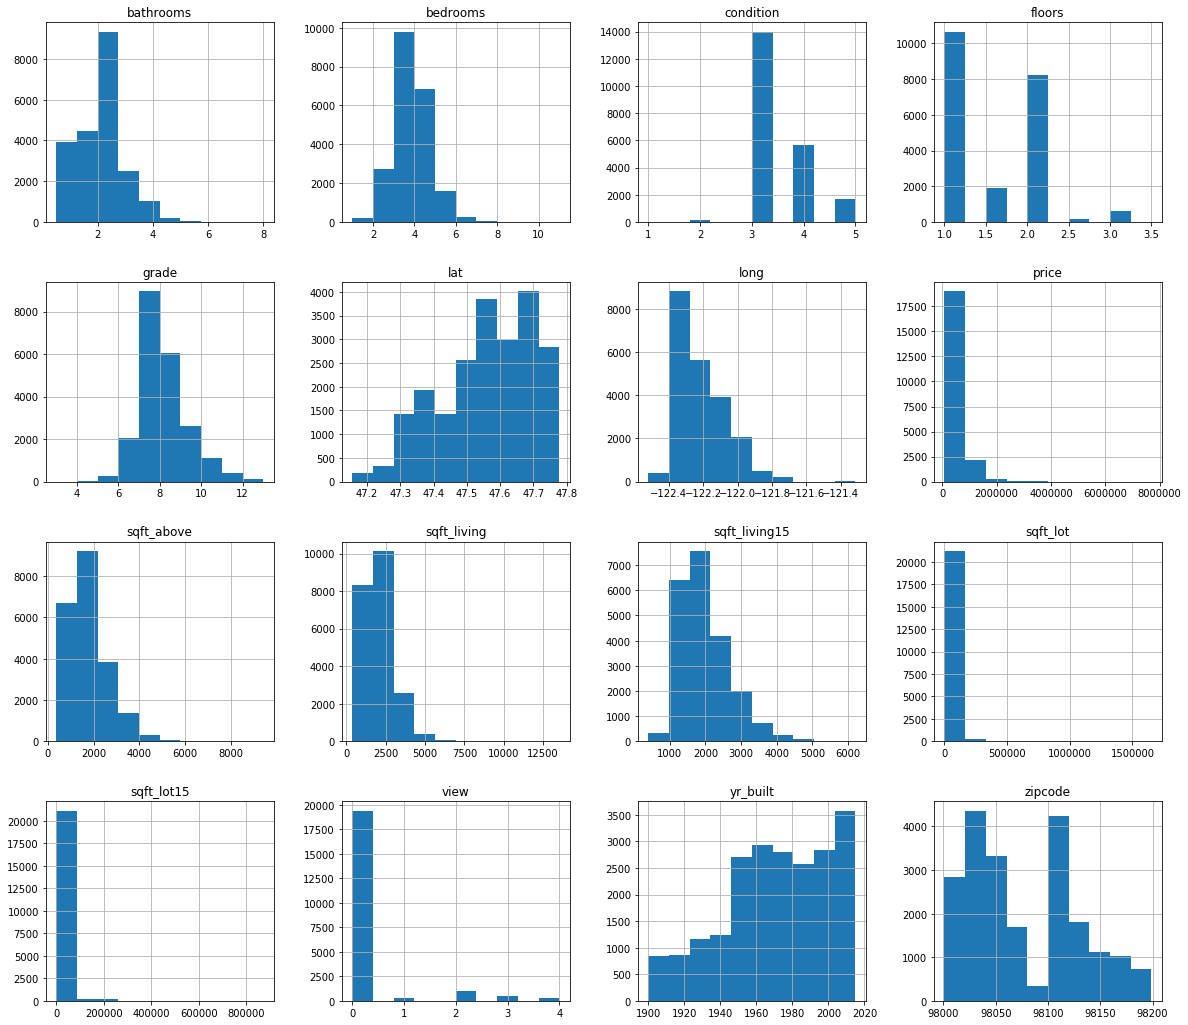

In [20]:
df.hist(figsize = (20,18)); 

Categorical variables appear to be: zipcode, view, grade, floors, condition, bedrooms, bathrooms. 

Grade looks normally distributed 

The numerical data present high levels of skewness and kurtosis and most likely heteroskedasticty for variables like sqft_lot and sqft_lot15

In [21]:
df.zipcode.describe()

count    21533.000000
mean     98077.938188
std         53.507609
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

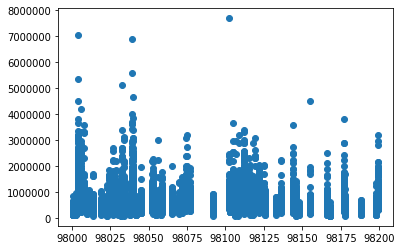

In [22]:
plt.scatter(df.zipcode,df.price)

#Keeping zipcode categorical for binning
df['zipcode']=df['zipcode'].astype('category')

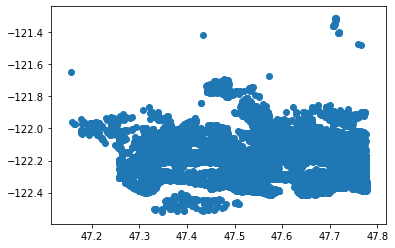

In [23]:
plt.scatter(df.lat, df.long)

In [24]:
#Will use zipcode for location info
df = df.drop(['lat', 'long'], axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21533 entries, 0 to 21596
Data columns (total 16 columns):
date             21533 non-null object
price            21533 non-null float64
bedrooms         21533 non-null int64
bathrooms        21533 non-null float64
sqft_living      21533 non-null int64
sqft_lot         21533 non-null int64
floors           21533 non-null float64
view             21533 non-null float64
condition        21533 non-null int64
grade            21533 non-null int64
sqft_above       21533 non-null int64
sqft_basement    21533 non-null object
yr_built         21533 non-null int64
zipcode          21533 non-null int64
sqft_living15    21533 non-null int64
sqft_lot15       21533 non-null int64
dtypes: float64(4), int64(10), object(2)
memory usage: 2.8+ MB


## Exploratory Data Analysis

In [26]:
#Change sqft_basement to float
df['sqft_basement']=df['sqft_basement'].astype(str)
df.sqft_basement.replace('?', 0, inplace = True)
df.sqft_basement.apply(pd.to_numeric);
df['sqft_basement']=df['sqft_basement'].astype(float)


In [27]:
#Create a dataframe of numerical variables, will also create a categorical 
df_numerical=pd.concat([df.sqft_living,
       df.sqft_living15,df.sqft_lot,df.sqft_lot15,df.yr_built,
       df.sqft_basement,df.sqft_above], axis=1)


In [28]:
df_numerical.describe()

,sqft_living,sqft_living15,sqft_lot,sqft_lot15,yr_built,sqft_basement,sqft_above
count,21533.000000,21533.000000,2.153300e+04,21533.000000,21533.000000,21533.000000,21533.000000
mean,2079.849208,1986.330423,1.509102e+04,12751.453397,1971.003390,285.230623,1788.592300
std,917.462472,685.122310,4.138112e+04,27256.060980,29.376271,439.339704,827.749142
min,370.000000,399.000000,5.200000e+02,651.000000,1900.000000,0.000000,370.000000
25%,1430.000000,1490.000000,5.040000e+03,5100.000000,1951.000000,0.000000,1190.000000
50%,1910.000000,1840.000000,7.617000e+03,7620.000000,1975.000000,0.000000,1560.000000
75%,2550.000000,2360.000000,1.068800e+04,10083.000000,1997.000000,550.000000,2210.000000
max,13540.000000,6210.000000,1.651359e+06,871200.000000,2015.000000,4820.000000,9410.000000


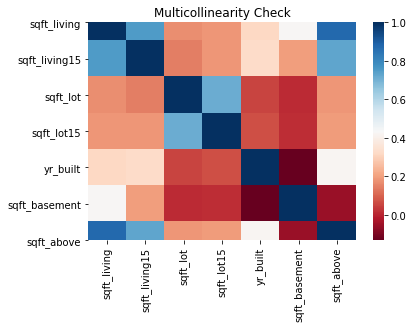

In [29]:
#Checking for multicollinearity in numerical database
color_map = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Multicollinearity Check')
_ = sns.heatmap(df_numerical.corr(), cmap="RdBu")

High correlation between sqft_living, sqft_living15 and sqft_above. 

In [30]:
#Prepare catagorical dataframe
df.floors = df.floors.astype('category')
#df.yr_built = df.yr_built.astype(float)
df.zipcode = df.zipcode.astype('category')
df.condition = df.condition.astype('category')
df.view = df.view.astype('category')
df.date = df.date.astype('category')
df.bedrooms = df.bedrooms.astype('category')
df.grade = df.grade.astype('category')
df.bathrooms = df.bathrooms.astype('category')
#df['waterfront']=df['waterfront'].astype(str).astype('category')#2 categories
df['date']=df['date'].astype('category')

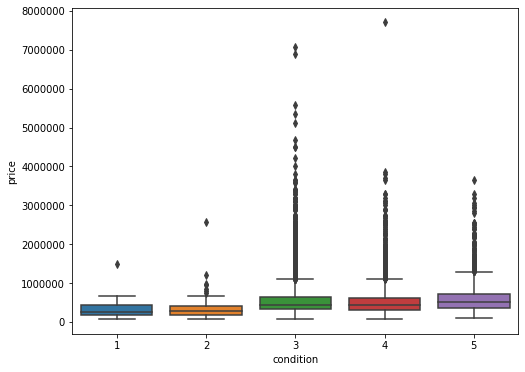

In [31]:
#Plotting catagorical data with box plots since the y (price) is numerical
var = 'condition'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)

Price appears to increase at condition 3 and above but I am not able to to clearly gauge it's effect. Will drop this variable.


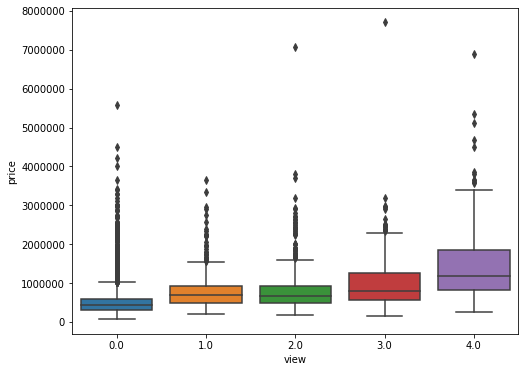

In [32]:
var = 'view'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)


It appears the more views a house has, the higher the price gets.

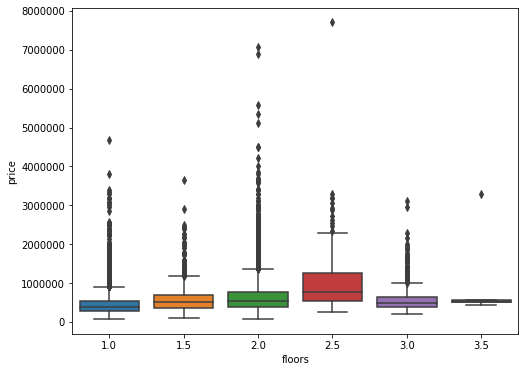

In [33]:
var = 'floors'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)

Price drops above 2.5 floors.

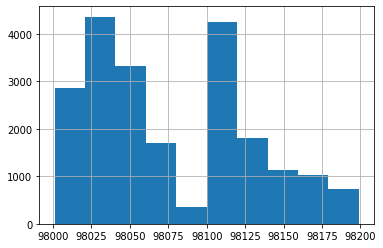

In [34]:
df.zipcode.hist()
#var = zipmean
#data = pd.concat([df['price'], df[var]], axis=1)
#f, ax = plt.subplots(figsize=(18, 6))
#fig = sns.boxplot(x=zipmean, y="price", data=data)

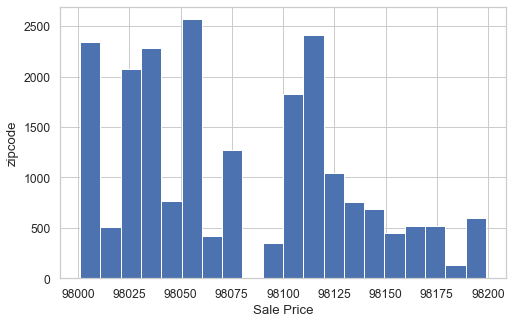

In [35]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['zipcode'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='zipcode');

Why does 98050 have fluctions in home prices -> future work

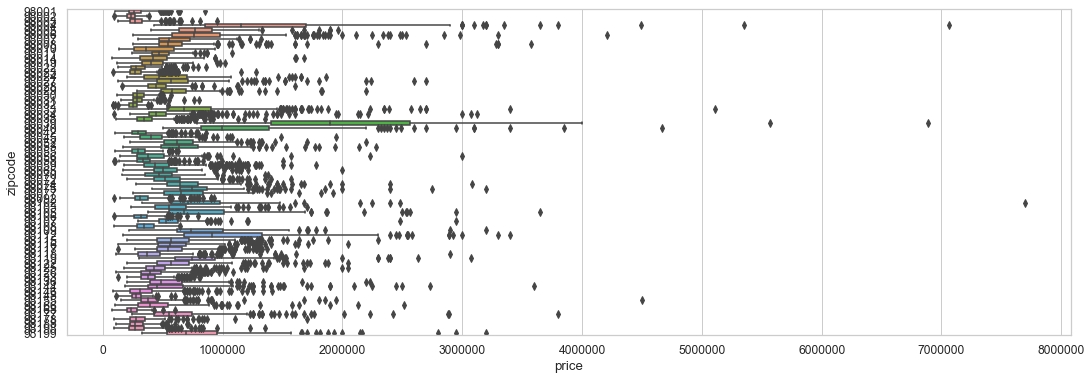

In [36]:
#Just checking to see what happens when I reverse axises 
var = 'zipcode'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x='price', y='zipcode', data=data)

Will use histogram and bargraph to represent zipcode

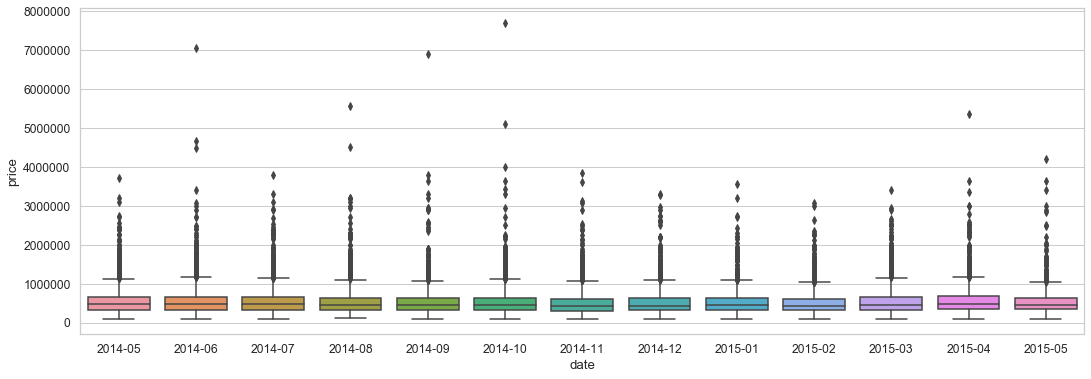

In [37]:
var = 'date'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=var, y="price", data=data)


Date not showing much affect on price, but more than 2 year may be needed to accurately tell.

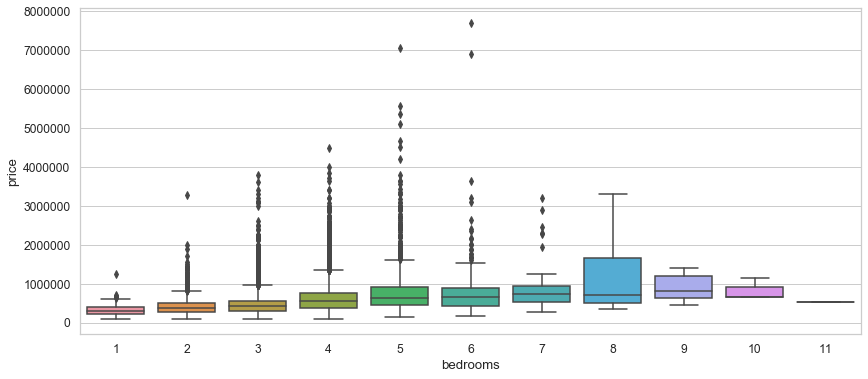

In [38]:
var = 'bedrooms'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)

The more bedrooms a house has, the higher it's price will be.

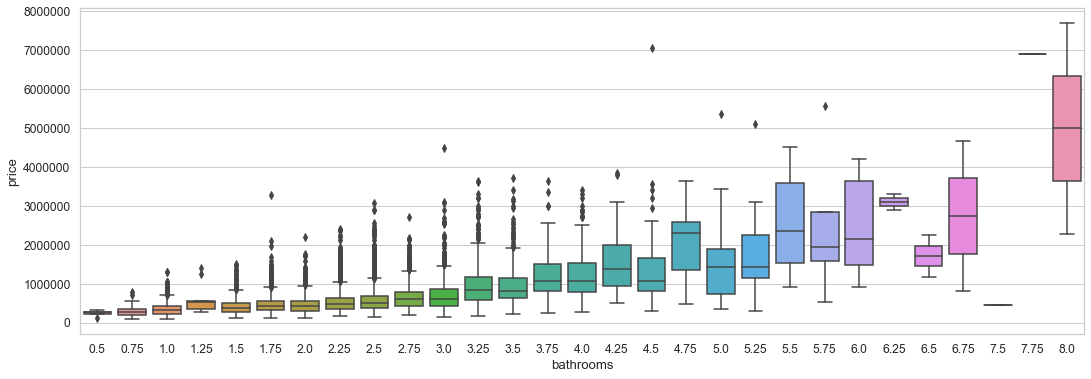

In [39]:
var = 'bathrooms'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=var, y="price", data=data)

More bathrooms looks like a higher price. Could this also link to the square footage of the house?

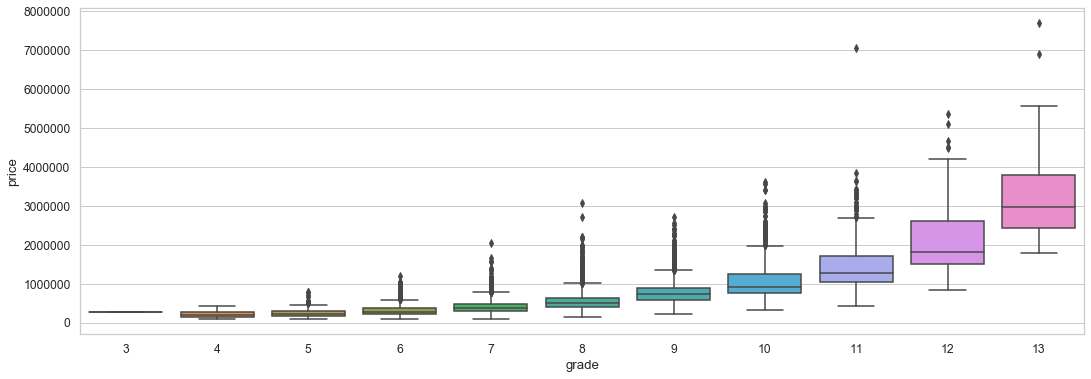

In [40]:
var = 'grade'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=var, y="price", data=data)

This shows that higher the grade, the higher the price.

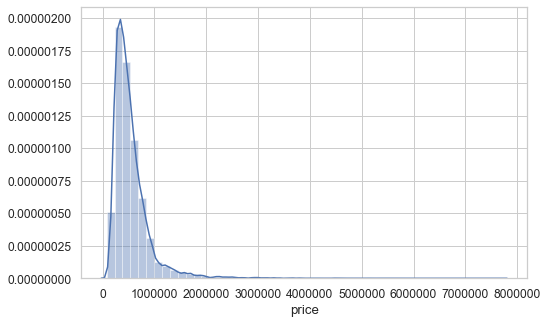

In [41]:
#Price is target variable, checking for normality
sns.distplot(df.price)

In [42]:
#Log transformation to normalize price distribution
#Using mean price later
mean_house_price = df.price.mean()
df["price"] = np.log(df["price"])
m=df.price.mean()
std=df.price.std()
df.price = (df.price - m) / std

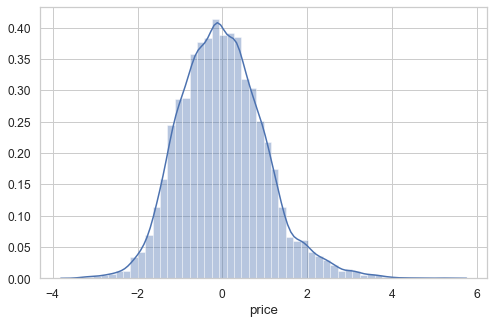

In [43]:
#Normal distribution
sns.distplot(df.price)

In [44]:
#Creating dummy variables
cond_dummies=pd.get_dummies(df.condition, prefix='cond')
view_dummies=pd.get_dummies(df.view, prefix='view')
floors_dummies=pd.get_dummies(df.floors, prefix='floor')
zipcode_dummies=pd.get_dummies(df.zipcode, prefix='zip')
grade_dummies=pd.get_dummies(df.grade, prefix='grade')
bed_dummies=pd.get_dummies(df.bedrooms, prefix='bed')
bath_dummies=pd.get_dummies(df.bathrooms, prefix='bath')

In [45]:
#Dropping one with the least value
zipcode_dummies.drop(['zip_98039'], axis = 1, inplace = True)
cond_dummies.drop(['cond_1'], axis = 1, inplace = True)
view_dummies.drop(['view_4.0'], axis = 1, inplace = True)
floors_dummies.drop(['floor_3.0'], axis = 1, inplace = True)
grade_dummies.drop(['grade_3'], axis = 1, inplace = True)
bed_dummies.drop(['bed_11'], axis = 1, inplace = True)
bath_dummies.drop(['bath_8.0'], axis = 1, inplace = True)

In [46]:
df_categorical=pd.concat([ zipcode_dummies, grade_dummies,bed_dummies,bath_dummies],
                         axis= 1)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


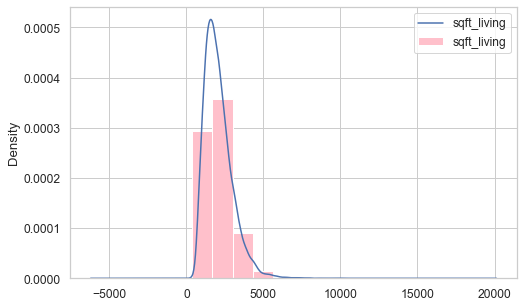

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


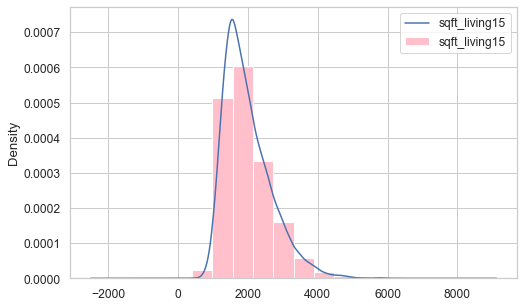

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


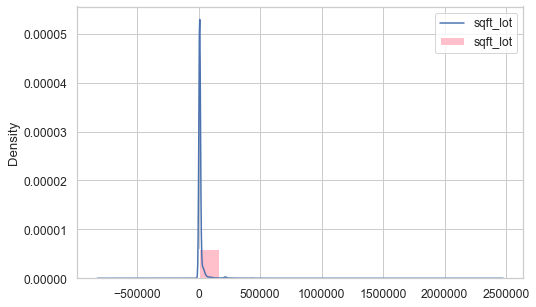

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


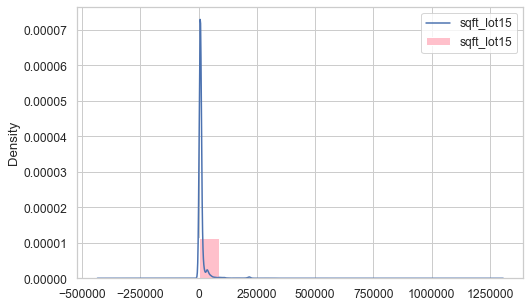

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


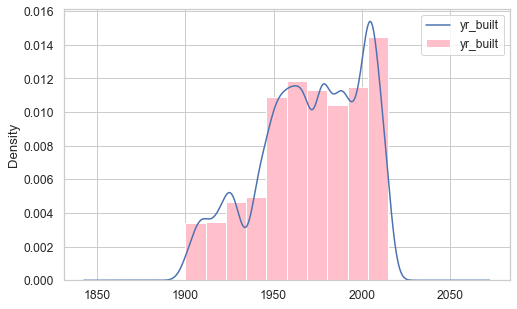

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


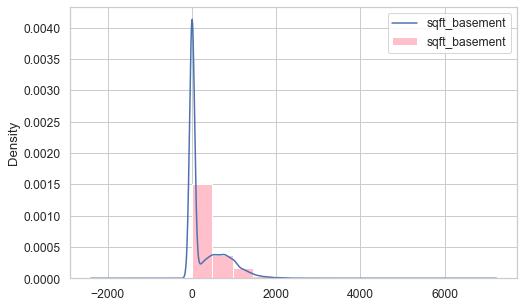

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


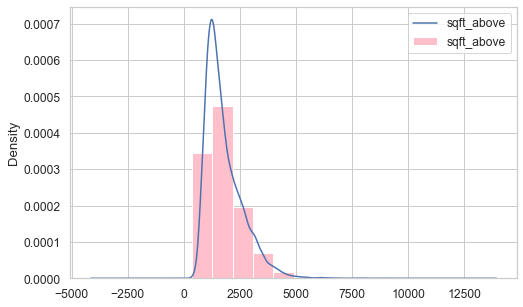

In [47]:
#Histograms w/Kerner Density Estimates (EDE) for numerical data
for column in ['sqft_living',
       'sqft_living15', 'sqft_lot', 'sqft_lot15','yr_built','sqft_basement','sqft_above']:
    df[column].plot.hist(normed=True, color='pink' )
    df[column].plot.kde(label=column )
    plt.legend()
    plt.show()

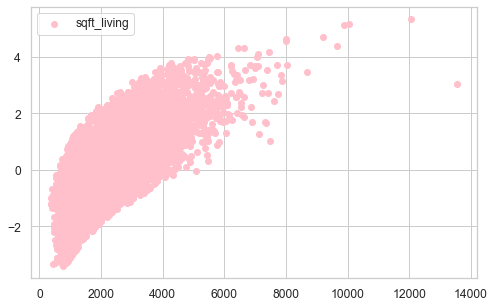

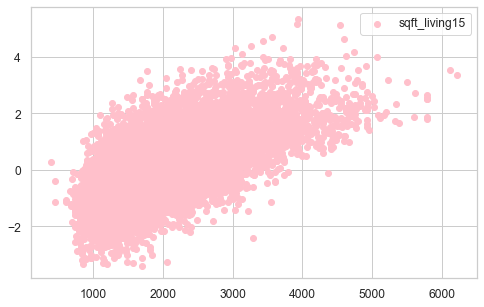

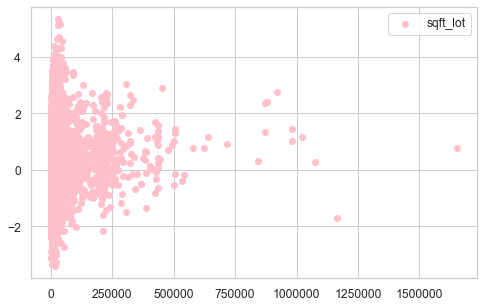

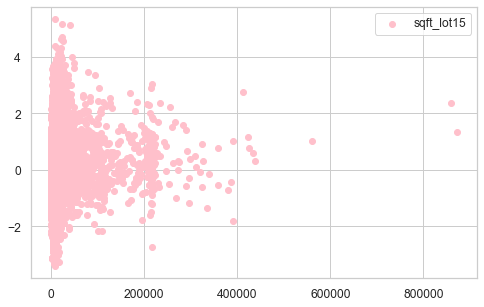

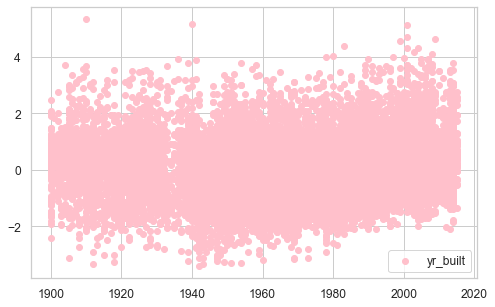

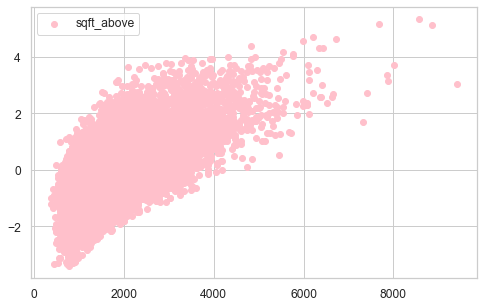

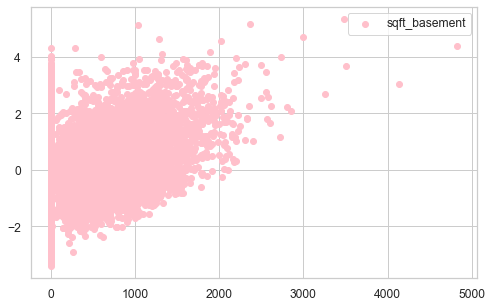

In [48]:
for column in ['sqft_living',
      'sqft_living15', 'sqft_lot', 'sqft_lot15','yr_built','sqft_above', 'sqft_basement']:
    plt.scatter(x=column, y="price", label=column, color='pink', data=df)
               
                  
                  
    plt.legend()
    plt.show()

sqft_living has the least amount of outliers from the other two it is correlated with. 



In [49]:
#Creating a data frame of log transformed variables 
data_log = pd.DataFrame([])
data_log["log_sqft_living"] = np.log(df["sqft_living"])
data_log["log_sqft_lot"] = np.log(df["sqft_lot"])
data_log["log_sqft_lot15"] = np.log(df["sqft_lot15"])

sqftlot=data_log["log_sqft_lot"]
sqftliving=data_log["log_sqft_living"]
sqftlot15=data_log["log_sqft_lot15"]


In [50]:
#Scaling
scaled_sqftliving = (sqftliving - sqftliving.mean()) / sqftliving.std()
scaled_sqftlot = (sqftlot - sqftlot.mean()) / sqftlot.std()
scaled_sqftlot15 = (sqftlot15 - sqftlot15.mean()) / sqftlot15.std()

In [51]:
#Combining them in a dataframe to run a last check before modelling
df_check=pd.concat([df.price,scaled_sqftliving,scaled_sqftlot,scaled_sqftlot15],axis=1)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


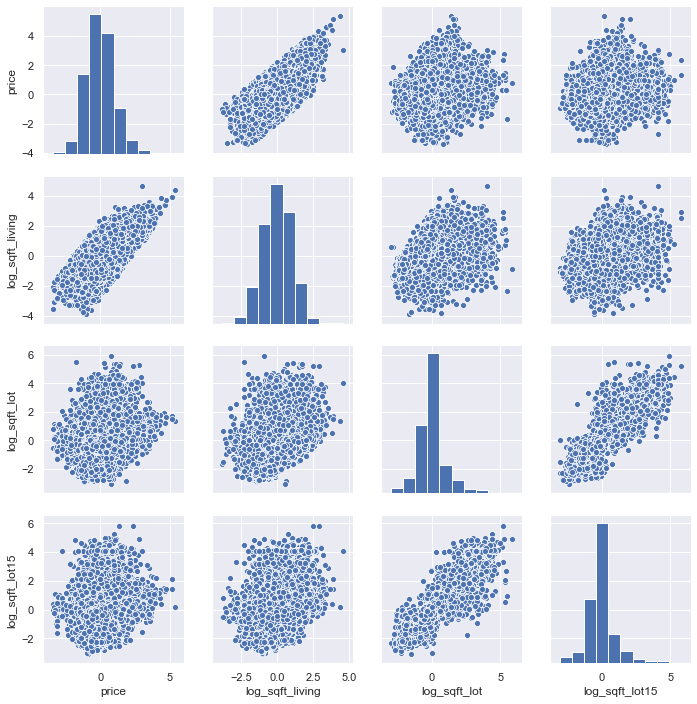

In [52]:
#Pair Plots
sns.set()
cols = ['price', 'log_sqft_living', 'log_sqft_lot', 'log_sqft_lot15']
sns.pairplot(df_check[cols], size = 2.5)
plt.show();

In [53]:
#Updating
df_numerical=pd.concat([scaled_sqftliving,df.sqft_basement,df.yr_built], axis=1)

## Modeling

In [54]:
#Initial Model
df_ols = pd.concat([df_categorical,df_numerical], axis= 1)
df_ols.head(3)

X=df_ols
y=df.price
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1054.
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:01:03   Log-Likelihood:                -9744.6
No. Observations:               21533   AIC:                         1.973e+04
Df Residuals:                   21412   BIC:                         2.070e+04
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.1328      0.666     15.204      0.000       8.827      11.439
zip_98001          -2.4149      0.059    -40.906      0.000      -2.531      -2.299
zip_98002          -2.4724      0.062    -40.022      0.000      -2.593      -2.351
zip_98003          -2.3961      0.060    -39.983      0.000      -2.514      -2.279
zip_98004          -0.3200      0.059     -5.416      0.000      -0.436      -0.204
zip_98005          -1.0561      0.063    -16.879      0.000      -1.179      -0.933
zip_98006          -1.1709      0.058    -20.291      0.000      -1.284      -1.058
zip_98007          -1.2164      0.064    -19.004      0.000      -1.342      -1.091
zip_98008          -1.1375      0.060    -19.016      0.000      -1.255      -1.020
zip_98010          -1.8702      0.067    -27.779      0.000      -2.002      -1.738
zip_98011          -1.5987      0.062    -25.875      0.000      -1.720      -1.478
zip_98014          -1.7713      0.065    -27.171      0.000      -1.899      -1.644
zip_98019          -1.7799      0.062    -28.686      0.000      -1.902      -1.658
zip_98022          -2.1779      0.061    -35.777      0.000      -2.297      -2.059
zip_98023          -2.4840      0.058    -42.826      0.000      -2.598      -2.370
zip_98024          -1.5108      0.070    -21.598      0.000      -1.648      -1.374
zip_98027          -1.4473      0.058    -24.770      0.000      -1.562      -1.333
zip_98028          -1.6441      0.060    -27.459      0.000      -1.762      -1.527
zip_98029          -1.3496      0.059    -22.727      0.000      -1.466      -1.233
zip_98030          -2.3315      0.060    -38.598      0.000      -2.450      -2.213
zip_98031          -2.2788      0.060    -37.910      0.000      -2.397      -2.161
zip_98032          -2.4899      0.065    -38.190      0.000      -2.618      -2.362
zip_98033          -0.9416      0.058    -16.175      0.000      -1.056      -0.827
zip_98034          -1.3985      0.058    -24.210      0.000      -1.512      -1.285
zip_98038          -2.0741      0.058    -35.909      0.000      -2.187      -1.961
zip_98040          -0.6859      0.060    -11.492      0.000      -0.803      -0.569
zip_98042          -2.2580      0.058    -39.028      0.000      -2.371      -2.145
zip_98045          -1.7500      0.061    -28.653      0.000      -1.870      -1.630
zip_98052          -1.2456      0.058    -21.631      0.000      -1.358      -1.133
zip_98053          -1.2912      0.059    -22.035      0.000      -1.406      -1.176
zip_98055          -2.1921      0.060    -36.443      0.000      -2.310      -2.074
zip_98056          -1.7963      0.059    -30.647      0.000      -1.911      -1.681
zip_98058          -2.1150      0.058    -36.332      0.000      -2.229      -2.001
zip_98059          -1.7626      0.058    -30.335      0.000

In [55]:
#Predictors selection:
#-------------------------------------------------------------------------------
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefficients except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [56]:
result = stepwise_selection(X, df["price"], verbose = True)
print('resulting features:')
print(result)

Add  grade_7                        with p-value 0.0
Add  grade_6                        with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  grade_8                        with p-value 0.0
Add  log_sqft_living                with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  grade_5                        with p-value 0.0
Add  zip_98004                      with p-value 8.8303e-229
Add  zip_98023                      with p-value 2.38452e-228
Add  grade_9                        with p-value 2.80311e-159
Add  zip_98001                      with p-value 8.82243e-128
Add  zip_98042                      with p-value 8.67248e-130
Add  zip_98092                      with p-value 1.07479e-137
Add  zip_98003                      with p-value 9.97415e-147
Add  zip_98058                      with p-value 1.40462e-114
Add  zip_98168                      with p-value 1.18286e-117
Add  zip_98198                      with p-value 4.79303e-114
Add  zip_9

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:47: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  zip_98146                      with p-value 2.02029e-84
Add  zip_98106                      with p-value 1.0085e-82
Add  zip_98056                      with p-value 6.31693e-80
Add  zip_98059                      with p-value 6.36604e-82
Add  grade_4                        with p-value 4.31579e-67
Add  grade_10                       with p-value 1.32049e-88
Add  zip_98033                      with p-value 1.79759e-70
Add  zip_98166                      with p-value 2.63034e-63
Add  zip_98118                      with p-value 2.91937e-67
Add  zip_98108                      with p-value 1.8829e-66
Add  zip_98133                      with p-value 1.68754e-66
Add  zip_98155                      with p-value 1.43221e-73
Add  zip_98148                      with p-value 2.43037e-58
Add  zip_98045                      with p-value 1.65163e-54
Add  zip_98028                      with p-value 1.76099e-52
Add  zip_98019                      with p-value 6.64392e-53
Add  zip_98105            

In [57]:
#Predictor dataframe
X=df_ols
[result[0]]
for i in range(1,len(result)):
    b=df_ols[result[i]]
    X=pd.concat([X,b], axis=1)


In [58]:
#Second run of model
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1054.
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:11:40   Log-Likelihood:                -9744.6
No. Observations:               21533   AIC:                         1.973e+04
Df Residuals:                   21412   BIC:                         2.070e+04
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.1328      0.666     15.204      0.000       8.827      11.439
zip_98001          -1.2074      0.030    -40.906      0.000      -1.265      -1.150
zip_98002          -1.2362      0.031    -40.022      0.000      -1.297      -1.176
zip_98003          -1.1980      0.030    -39.983      0.000      -1.257      -1.139
zip_98004          -0.1600      0.030     -5.416      0.000      -0.218      -0.102
zip_98005          -0.5280      0.031    -16.879      0.000      -0.589      -0.467
zip_98006          -0.5854      0.029    -20.291      0.000      -0.642      -0.529
zip_98007          -0.6082      0.032    -19.004      0.000      -0.671      -0.545
zip_98008          -0.5688      0.030    -19.016      0.000      -0.627      -0.510
zip_98010          -0.9351      0.034    -27.779      0.000      -1.001      -0.869
zip_98011          -0.7994      0.031    -25.875      0.000      -0.860      -0.739
zip_98014          -0.8857      0.033    -27.171      0.000      -0.950      -0.822
zip_98019          -0.8900      0.031    -28.686      0.000      -0.951      -0.829
zip_98022          -1.0889      0.030    -35.777      0.000      -1.149      -1.029
zip_98023          -1.2420      0.029    -42.826      0.000      -1.299      -1.185
zip_98024          -0.7554      0.035    -21.598      0.000      -0.824      -0.687
zip_98027          -0.7237      0.029    -24.770      0.000      -0.781      -0.666
zip_98028          -0.8221      0.030    -27.459      0.000      -0.881      -0.763
zip_98029          -0.6748      0.030    -22.727      0.000      -0.733      -0.617
zip_98030          -1.1658      0.030    -38.598      0.000      -1.225      -1.107
zip_98031          -1.1394      0.030    -37.910      0.000      -1.198      -1.080
zip_98032          -1.2450      0.033    -38.190      0.000      -1.309      -1.181
zip_98033          -0.4708      0.029    -16.175      0.000      -0.528      -0.414
zip_98034          -0.6992      0.029    -24.210      0.000      -0.756      -0.643
zip_98038          -1.0370      0.029    -35.909      0.000      -1.094      -0.980
zip_98040          -0.3430      0.030    -11.492      0.000      -0.401      -0.284
zip_98042          -1.1290      0.029    -39.028      0.000      -1.186      -1.072
zip_98045          -0.8750      0.031    -28.653      0.000      -0.935      -0.815
zip_98052          -0.6228      0.029    -21.631      0.000      -0.679      -0.566
zip_98053          -0.6456      0.029    -22.035      0.000      -0.703      -0.588
zip_98055          -1.0960      0.030    -36.443      0.000      -1.155      -1.037
zip_98056          -0.8982      0.029    -30.647      0.000      -0.956      -0.841
zip_98058          -1.0575      0.029    -36.332      0.000      -1.115      -1.000
zip_98059          -0.8813      0.029    -30.335      0.000